In [98]:
##Multiple Linear Regression
##Bike Sharing Assignment


In [99]:
# to Supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [100]:
#Read csv file
bike = pd.read_csv('day.csv')

In [101]:
#get top 5 records
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [102]:
#get the shape of the file
bike.shape

(730, 16)

In [103]:
#describing columns of data set
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [104]:
#get info of each column 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [105]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [106]:
# renaming few columns for better readibility

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [107]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [108]:
#drop unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [109]:
#Mapping Season column
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [110]:
# Mapping month column 
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [111]:
# Mapping weekday Column
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [112]:
# Mapping weathershit column
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [113]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [114]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


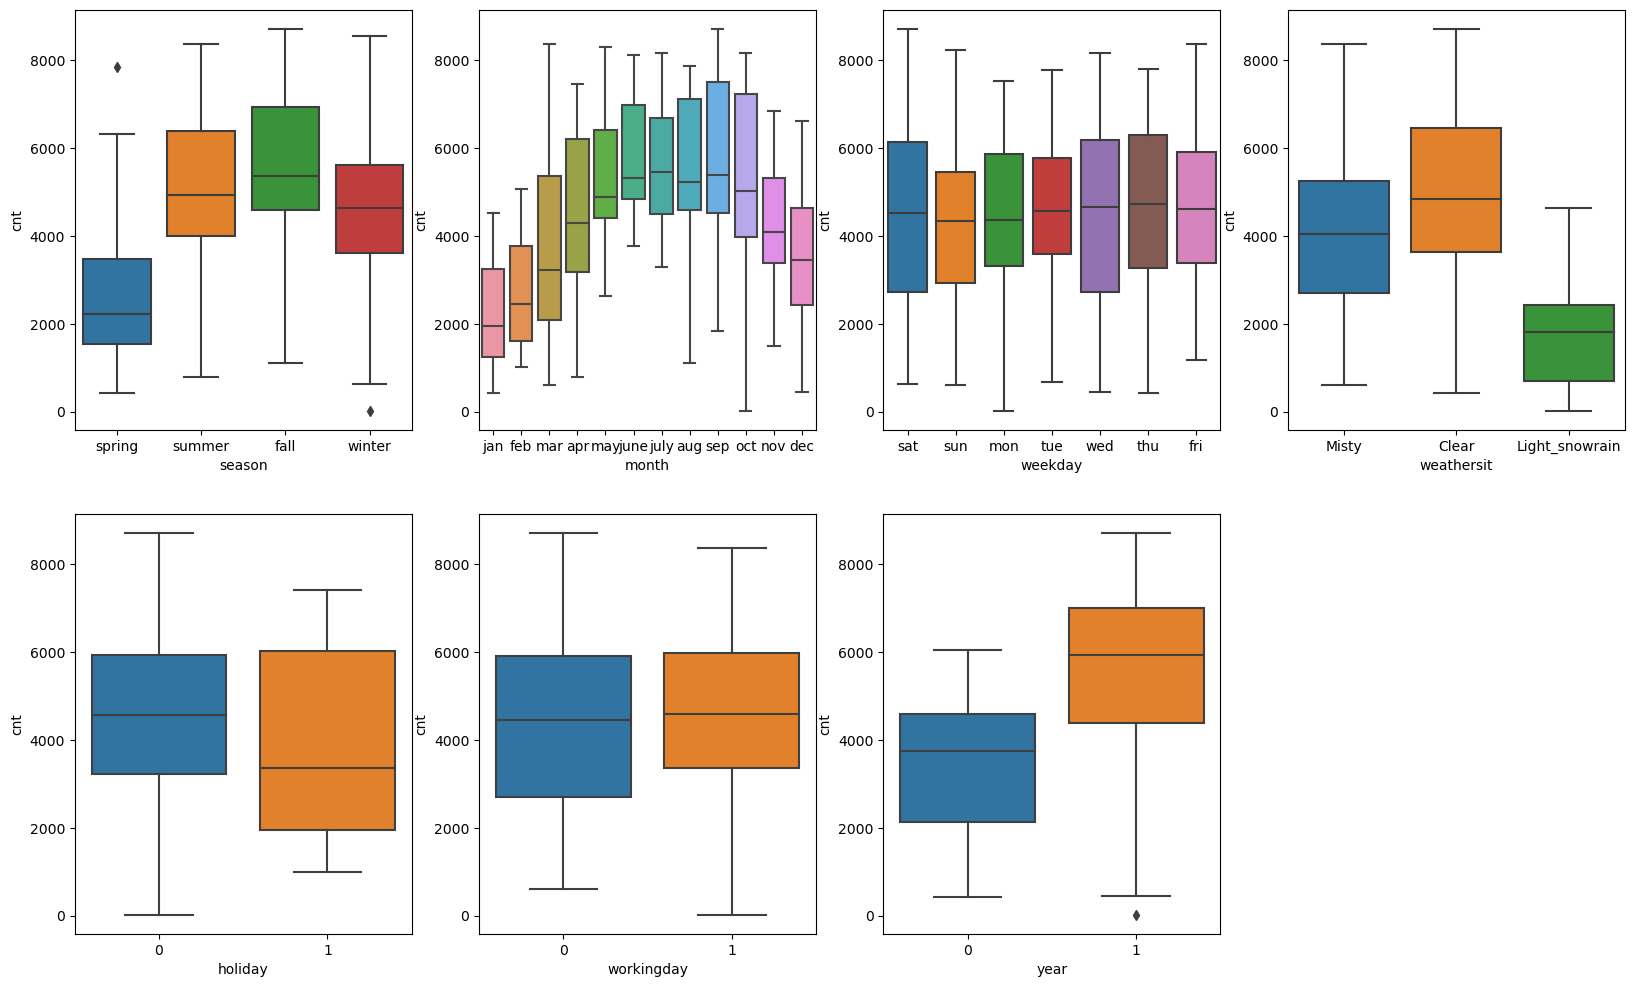

In [115]:
## Visualising the Data
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.show()

In [116]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike, hue='year',palette='Set1')
    plt.legend(labels=['2021', '2022'])
    plt.show()

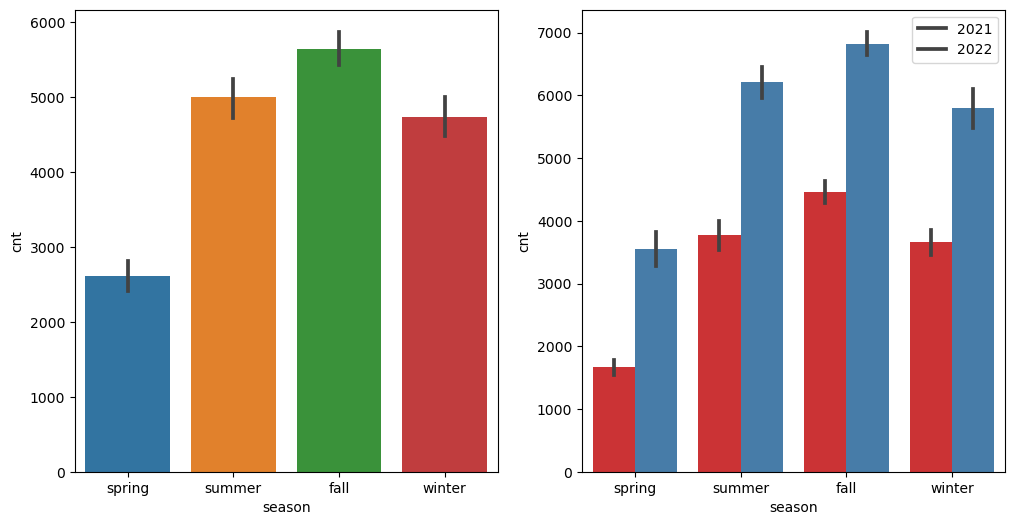

In [117]:
# plotting visualization for season column

plot_cat_columns('season')

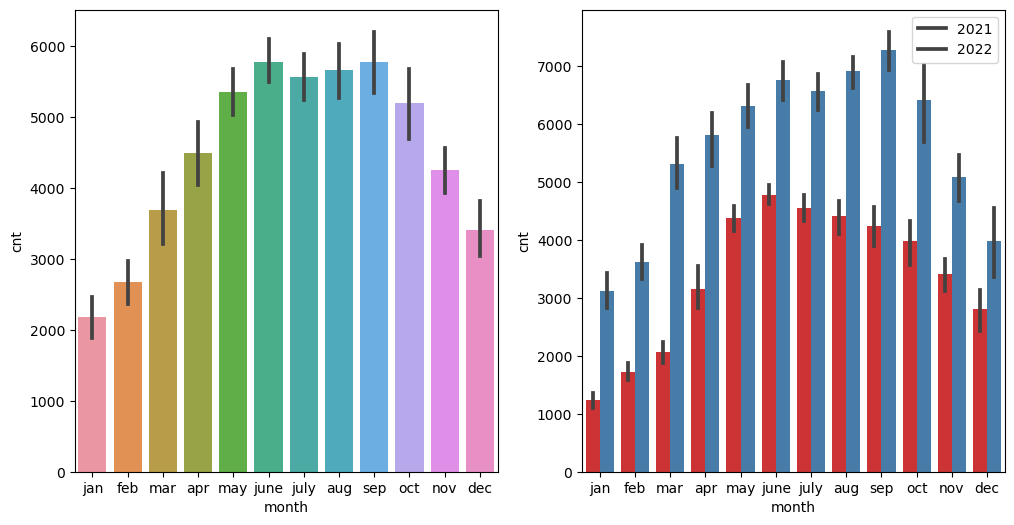

In [118]:
# plotting visualization for month column

plot_cat_columns('month')

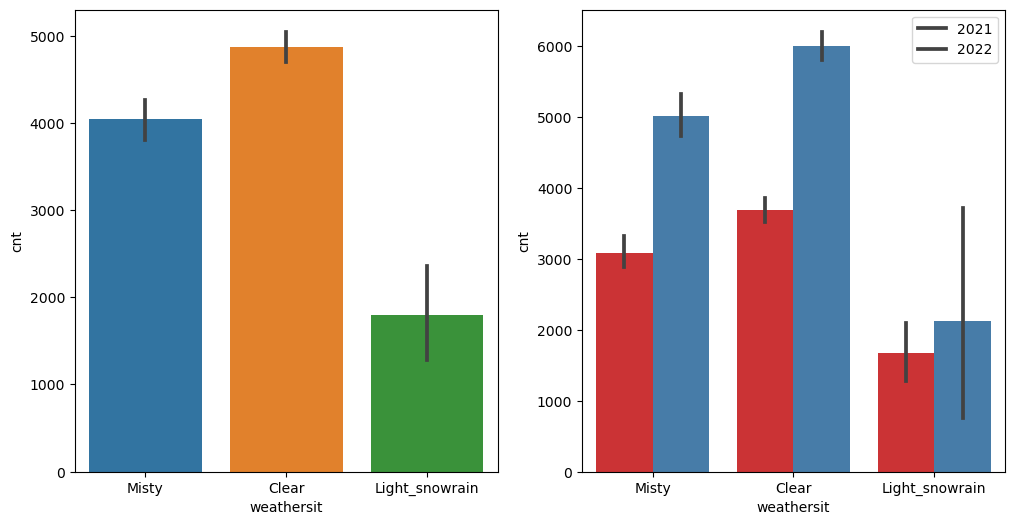

In [119]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

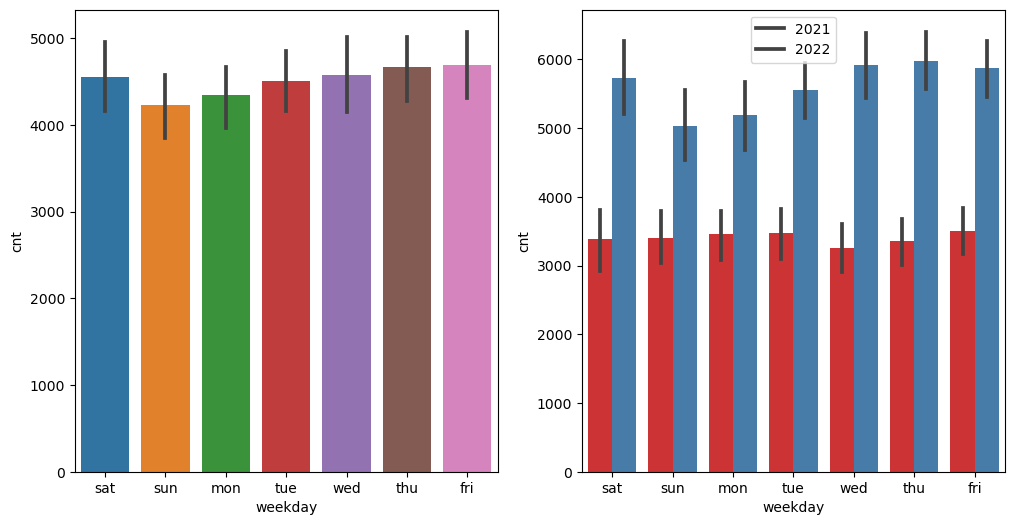

In [120]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

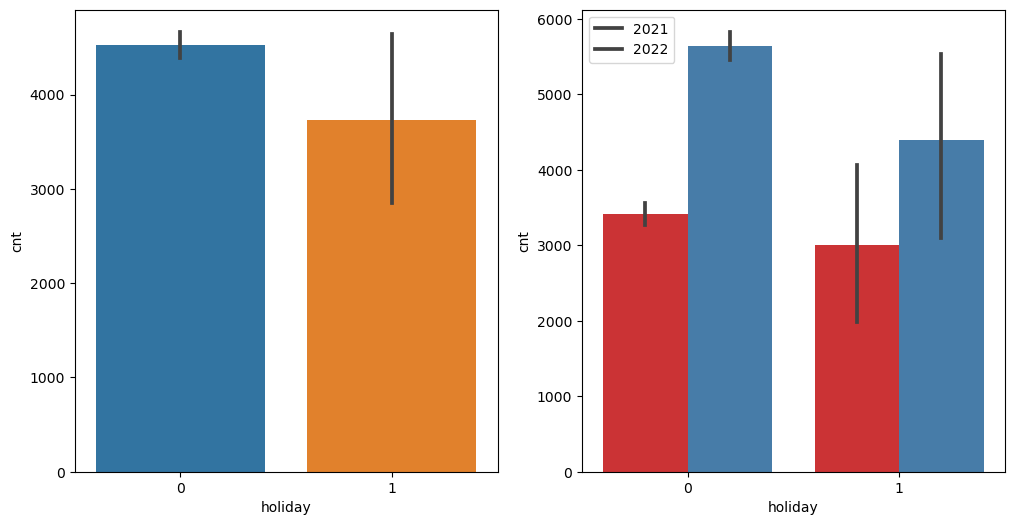

In [121]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

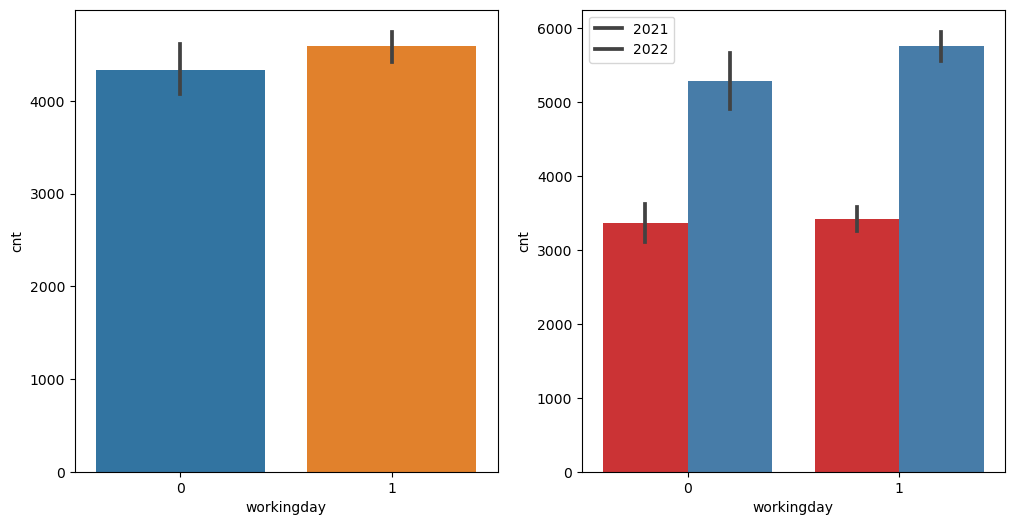

In [122]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

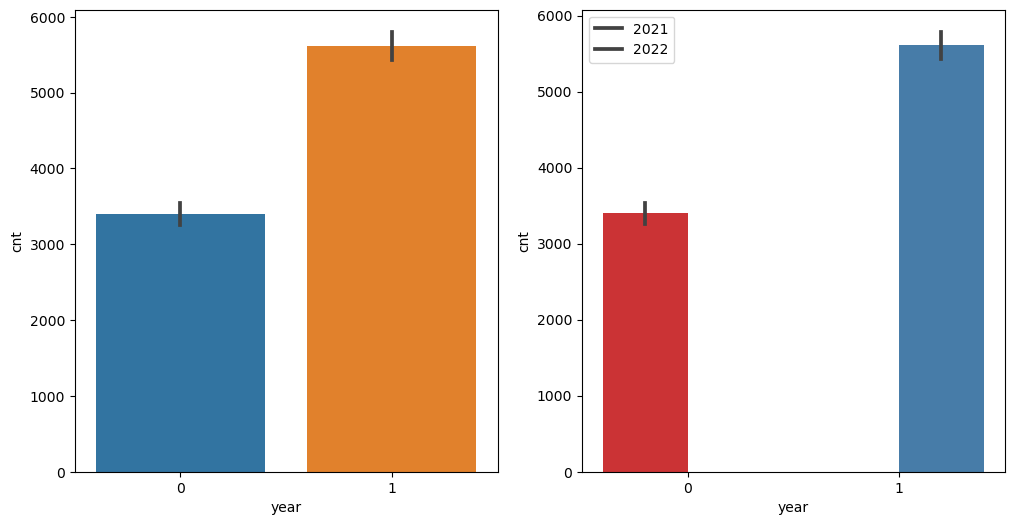

In [123]:
# plotting visualization for year column

plot_cat_columns('year')

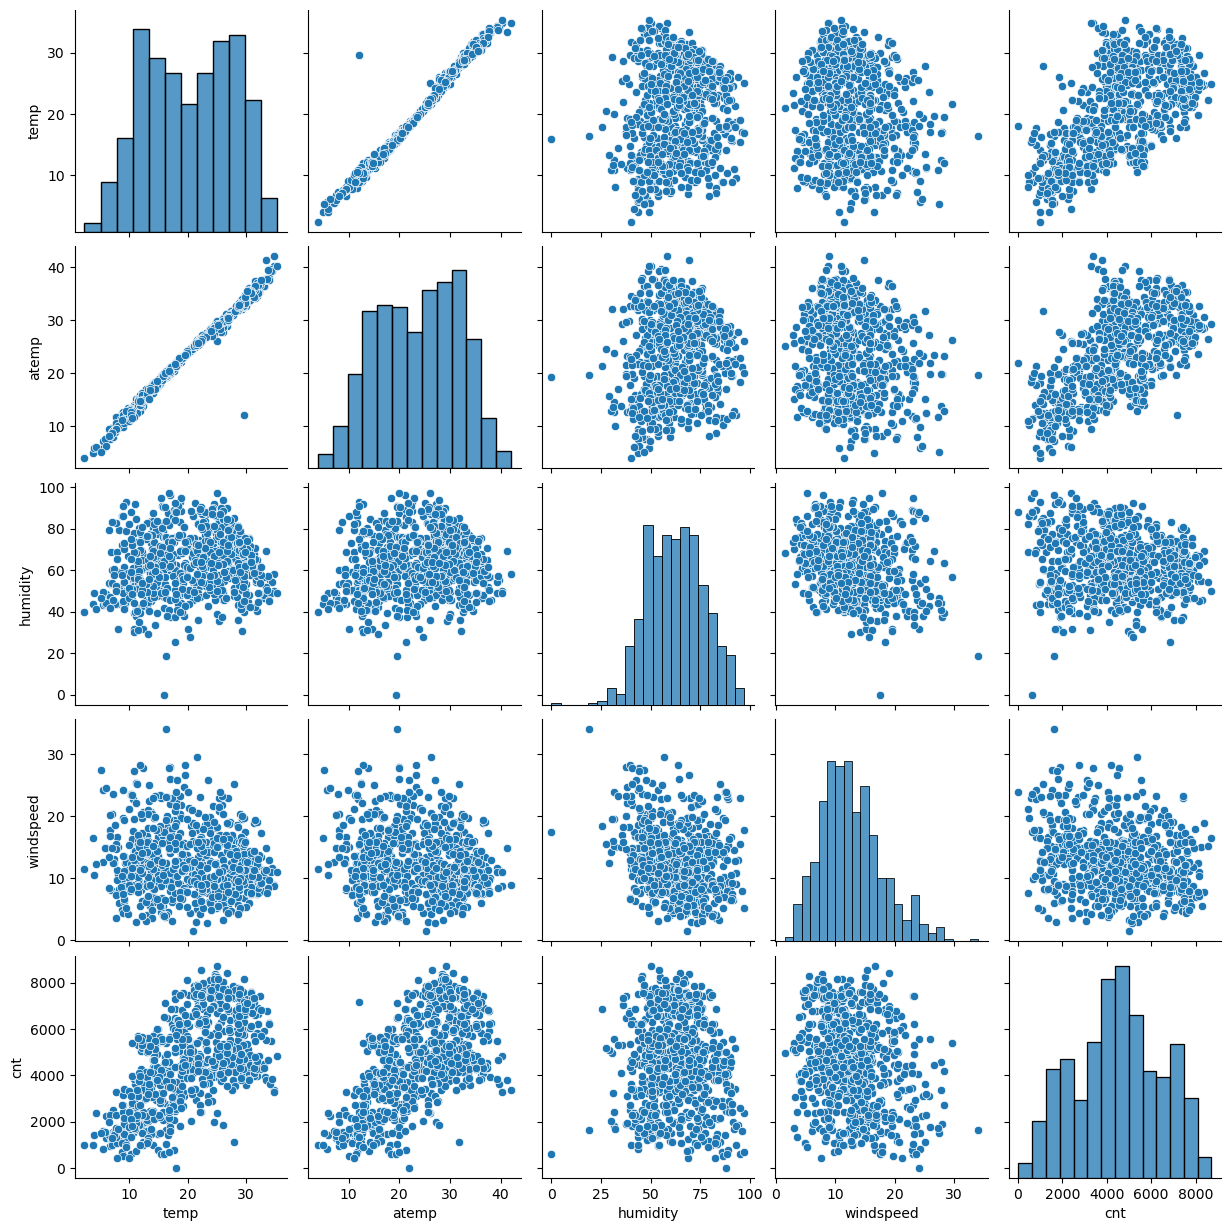

In [124]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

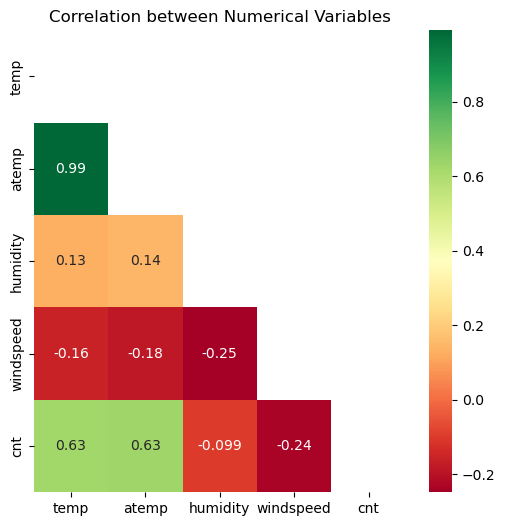

In [125]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [126]:
#Step 3: Data Preparation
# Dummy variable creation for month, weekday, weathersit and season variables.

months_bike=pd.get_dummies(bike.month,drop_first=True)
weekdays_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike.season,drop_first=True)

In [127]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [128]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_new = pd.concat([bike,months_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)

In [129]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [130]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [131]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [132]:
# check the head of new dataframe

bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [133]:
# check the shape of new dataframe

bike_new.shape

(730, 30)

In [134]:
# check the column info of new dataframe 

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [135]:
#Step 4: Splitting the Data into Training and Testing Sets
# splitting the dataframe into Train and Test

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [136]:
# check the shape of training datatset

bike_train.shape

(510, 30)

In [137]:
# check the shape of testing datatset

bike_test.shape

(220, 30)

In [138]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [139]:
# verifying the head of dataset before scaling.

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [140]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [141]:
# verifying the head after appying scaling.

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [142]:
# describing the dataset

bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


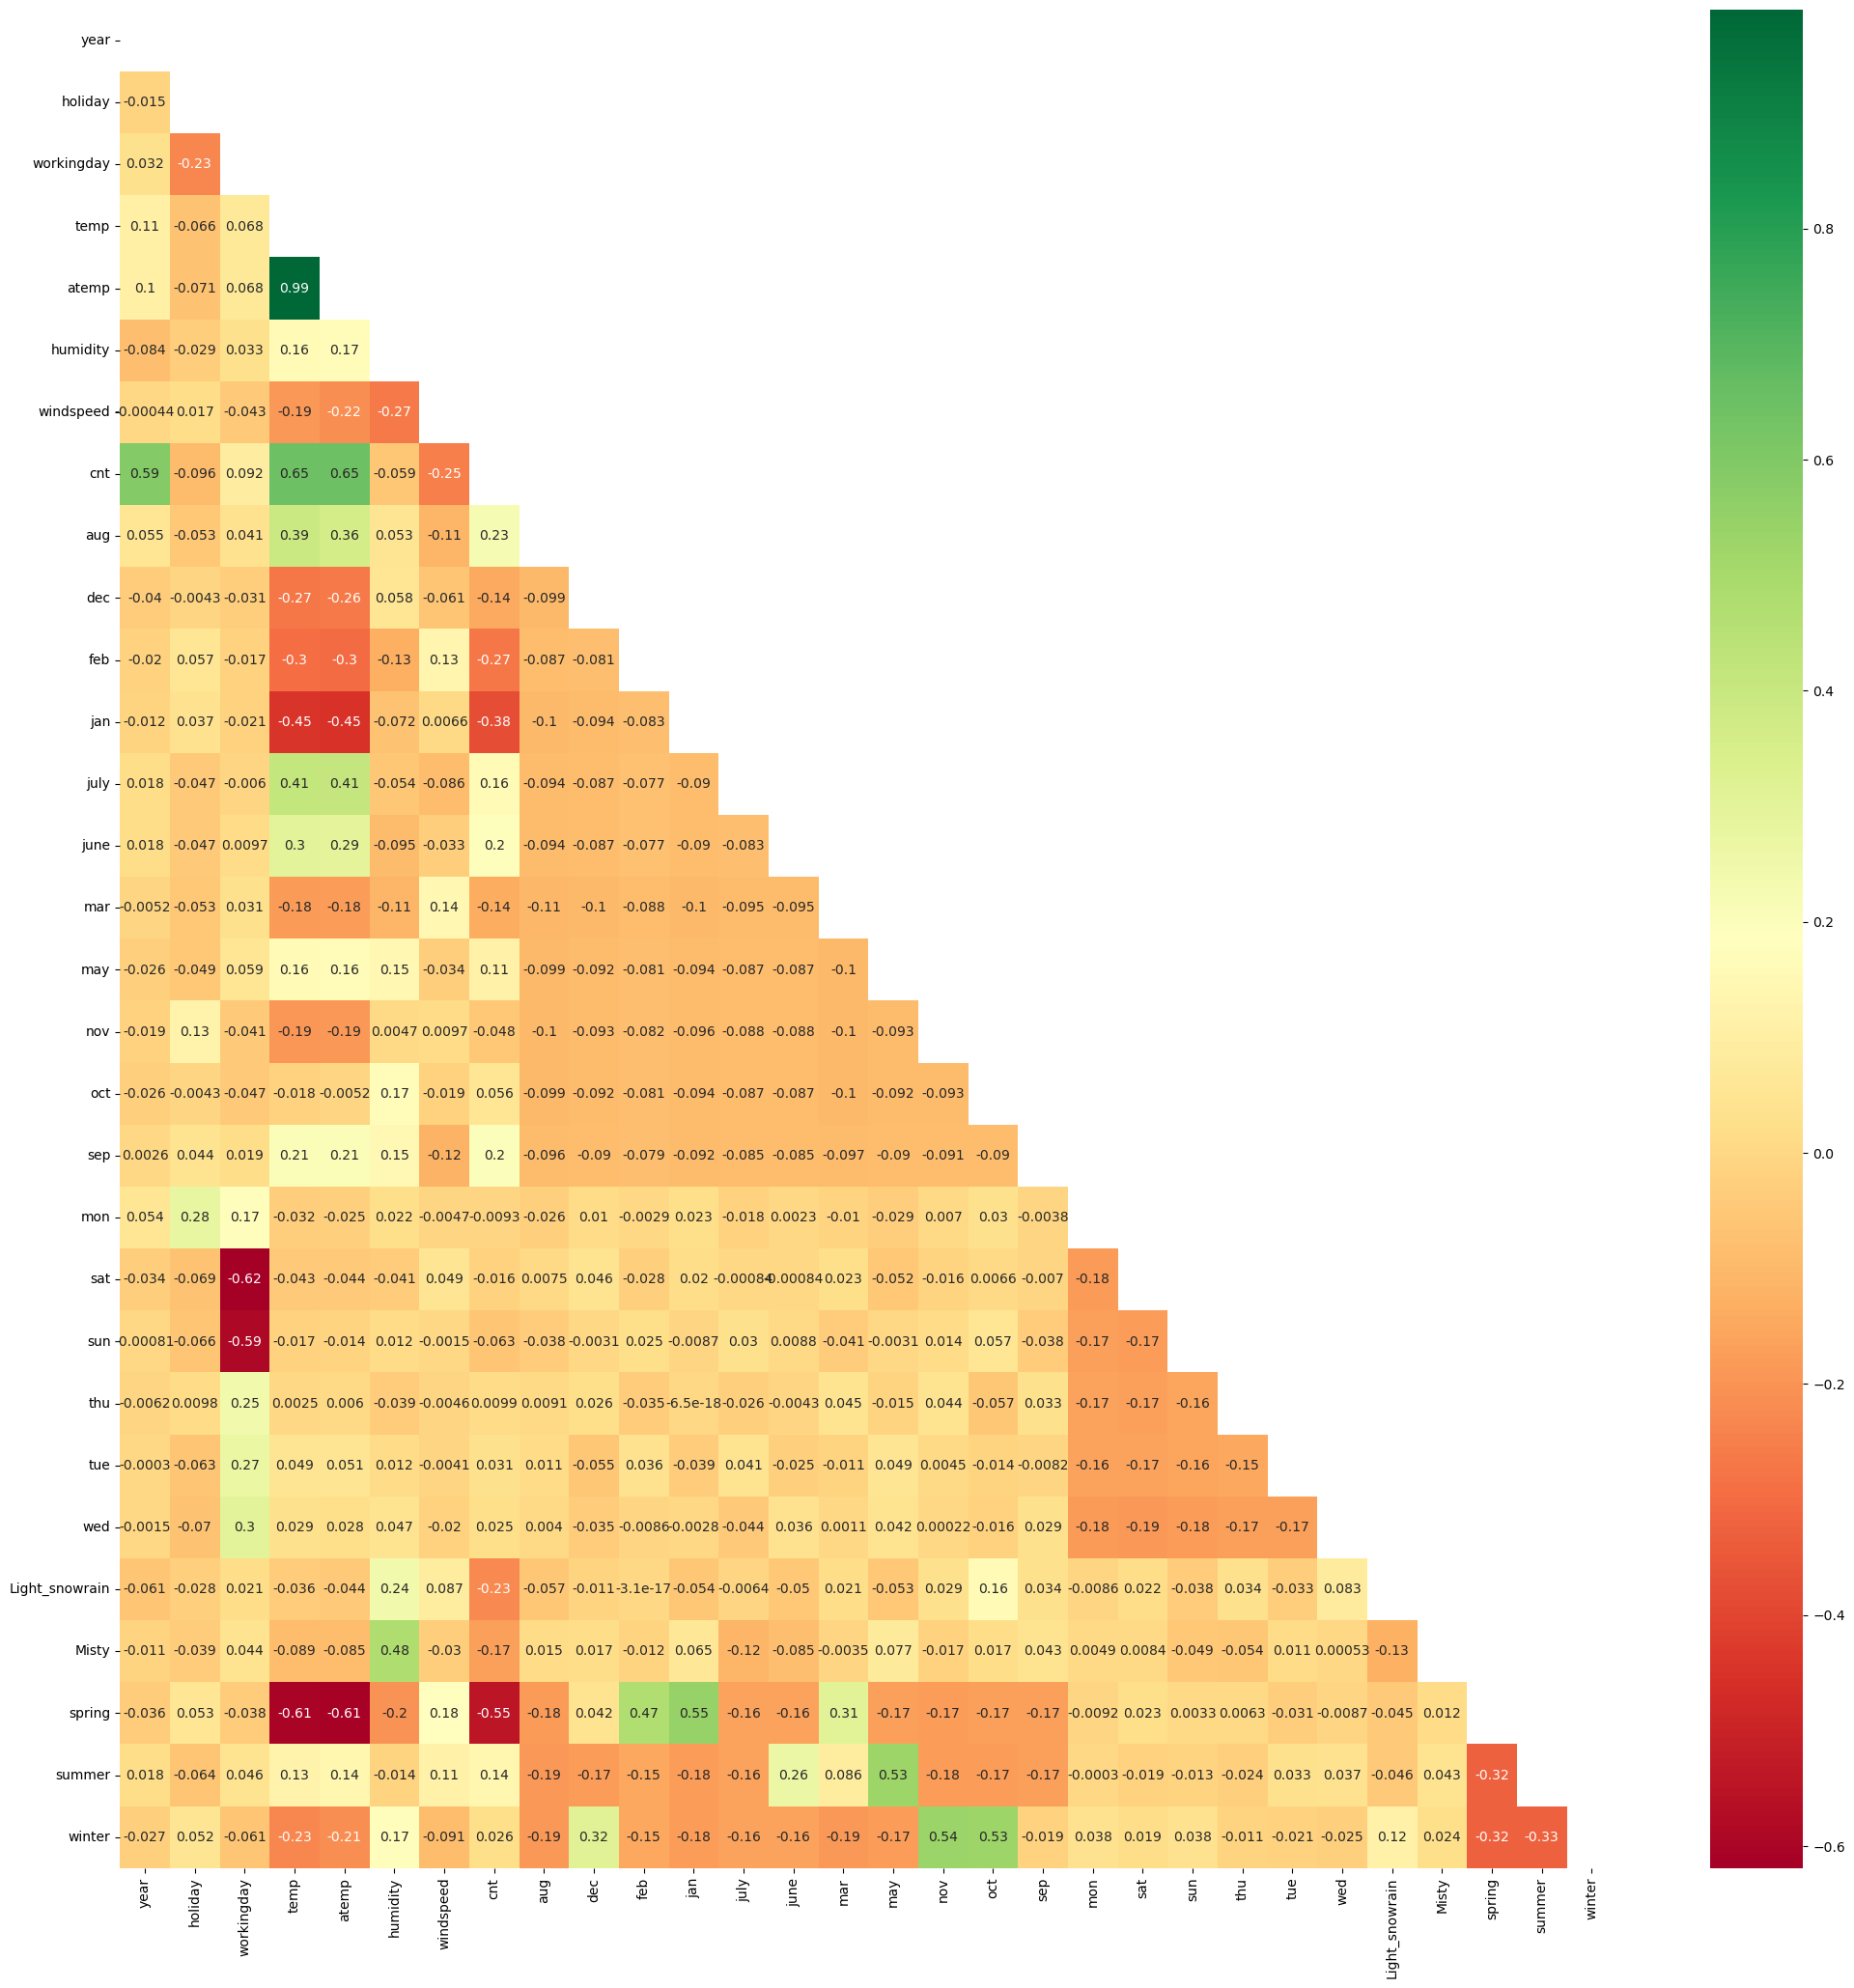

In [143]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

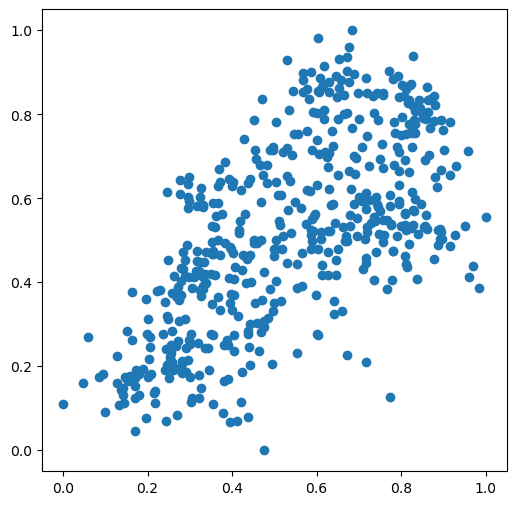

In [144]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

In [145]:
# Building the Linear Model

y_train = bike_train.pop('cnt')
X_train = bike_train

In [148]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [149]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 13),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 12),
 ('may', False, 7),
 ('nov', False, 4),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 8),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 16),
 ('winter', False, 2)]

In [150]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty',
       'spring'],
      dtype='object')


In [151]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer', 'winter'],
      dtype='object')

In [152]:
# Generic function to calculate VIF of variables

def calculateVIF(bike):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [153]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [154]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,atemp,51.17
3,temp,50.58
2,workingday,36.47
9,sat,8.89
10,sun,8.68
1,holiday,2.31
5,humidity,1.84
13,spring,1.66
12,Misty,1.54
7,july,1.30


In [155]:
##Step 5: Building a linear model
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.44e-186
Time:                        14:01:06   Log-Likelihood:                 501.39
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     496   BIC:                            -915.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2804      0.024     11.

In [156]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,atemp,50.83
3,temp,50.46
2,workingday,15.48
8,sat,4.23
9,sun,3.90
12,spring,1.65
1,holiday,1.48
6,july,1.28
5,windspeed,1.11
7,sep,1.11


In [157]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.47e-185
Time:                        14:01:12   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2221      0.016     13.

In [159]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,334.88
4,atemp,331.45
2,workingday,4.44
5,windspeed,4.01
0,year,2.05
8,sun,1.69
11,spring,1.66
10,Misty,1.52
6,july,1.35
7,sep,1.20


In [160]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.47e-185
Time:                        14:15:36   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3219      0.021     15.

In [161]:
# We can drop sep variable as it has high p-value
X_train_new = X_train_new.drop(['sep'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,333.82
4,atemp,331.32
2,workingday,4.44
5,windspeed,3.96
0,year,2.05
7,sun,1.69
10,spring,1.65
9,Misty,1.51
6,july,1.30
1,holiday,1.12


In [162]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          2.35e-183
Time:                        14:16:34   Log-Likelihood:                 490.12
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     498   BIC:                            -905.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.022     14.

In [163]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,atemp,330.47
3,temp,330.24
2,workingday,4.39
5,windspeed,3.91
0,year,2.04
6,sun,1.69
9,spring,1.65
8,Misty,1.49
1,holiday,1.11
7,Light_snowrain,1.06


In [164]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          1.01e-179
Time:                        14:16:57   Log-Likelihood:                 478.70
No. Observations:                 510   AIC:                            -935.4
Df Residuals:                     499   BIC:                            -888.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3375      0.022     15.

In [165]:
# We can drop sun variable as it has high p-value
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,329.41
4,atemp,327.00
5,windspeed,3.79
2,workingday,3.02
0,year,2.03
8,spring,1.58
7,Misty,1.49
1,holiday,1.07
6,Light_snowrain,1.06


In [166]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          6.04e-178
Time:                        14:17:23   Log-Likelihood:                 471.64
No. Observations:                 510   AIC:                            -923.3
Df Residuals:                     500   BIC:                            -880.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3084      0.021     14.

In [167]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.308396
year              0.235727
holiday          -0.070983
workingday        0.016413
temp              0.238265
atemp             0.131287
windspeed        -0.149598
Light_snowrain   -0.273619
Misty            -0.076020
spring           -0.152345
dtype: float64

In [168]:
X_train_lm_6

,const,year,holiday,workingday,temp,atemp,windspeed,Light_snowrain,Misty,spring
576,1.0,1,0,1,0.815169,0.766351,0.264686,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.255342,0,1,1
728,1.0,1,0,0,0.245101,0.200348,0.663106,0,0,1
482,1.0,1,0,0,0.395666,0.391735,0.188475,0,1,0
111,1.0,0,0,1,0.345824,0.318819,0.380981,0,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.824359,0.187140,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.111379,0,0,1
350,1.0,0,0,0,0.248216,0.223544,0.431816,0,1,0
79,1.0,0,0,1,0.462664,0.434043,0.529881,0,1,0


In [169]:
y_train_pred = lr_6.predict(X_train_lm_6)


Text(0.5, 0, 'Errors')

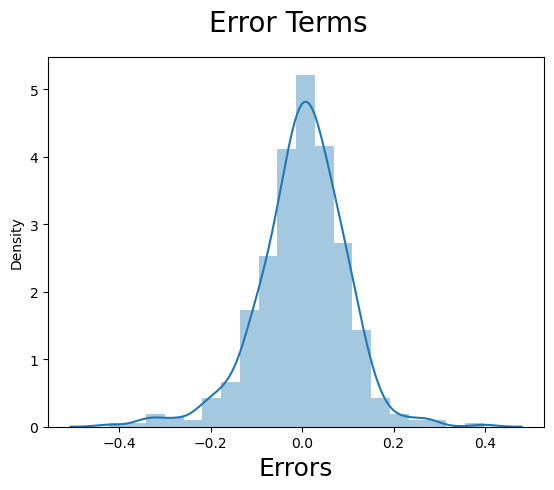

In [170]:
##Normality of error terms
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [171]:
## Multi Colinearity
calculateVIF(X_train_new)

,Features,VIF
3,temp,329.41
4,atemp,327.00
5,windspeed,3.79
2,workingday,3.02
0,year,2.03
8,spring,1.58
7,Misty,1.49
1,holiday,1.07
6,Light_snowrain,1.06


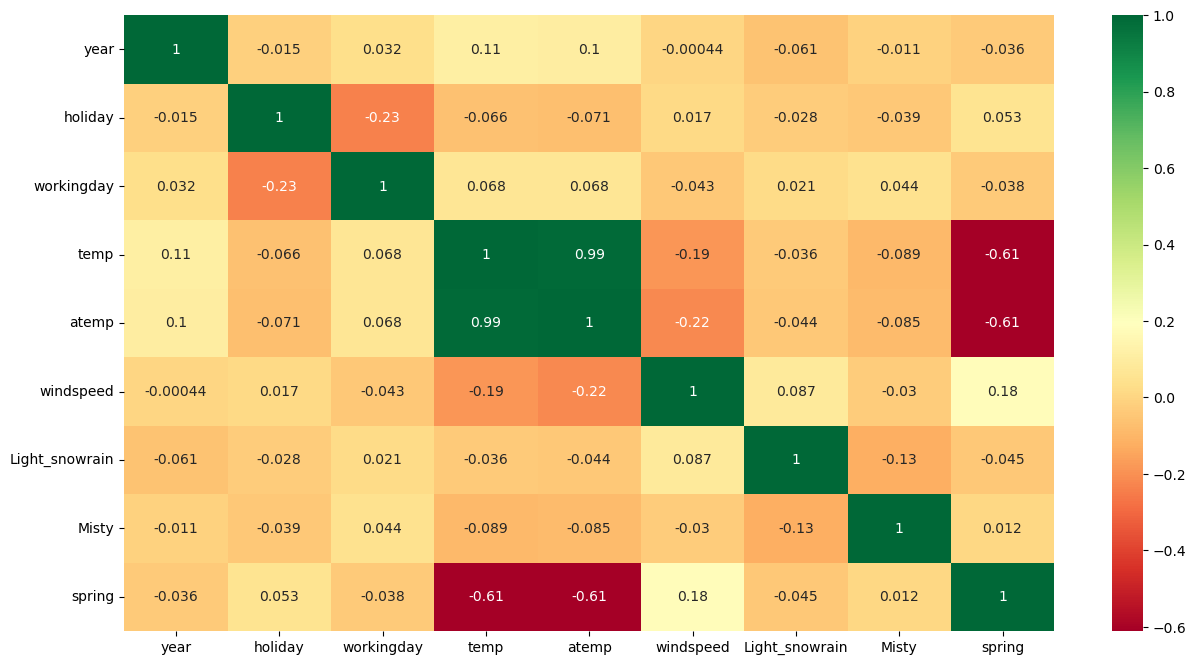

In [172]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

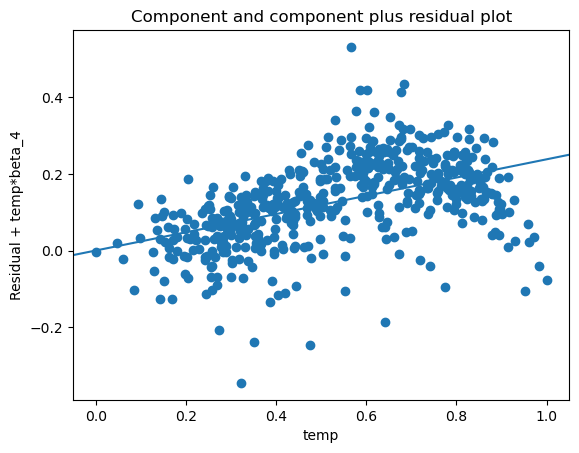

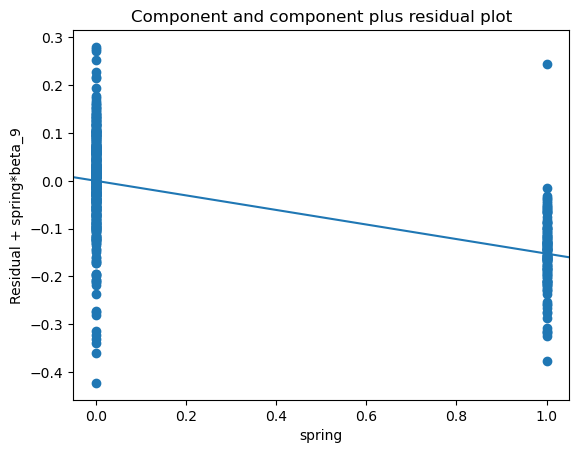

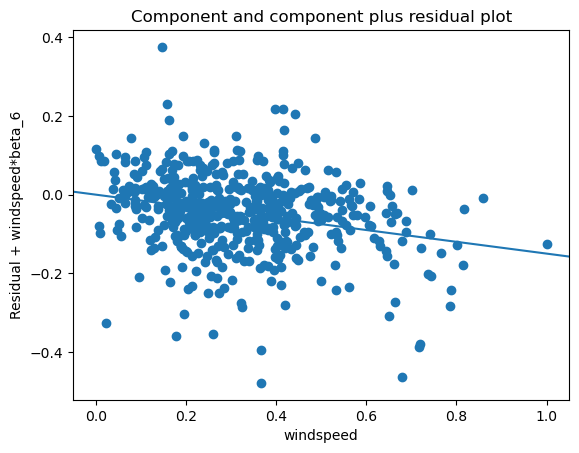

In [174]:
## Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'spring')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

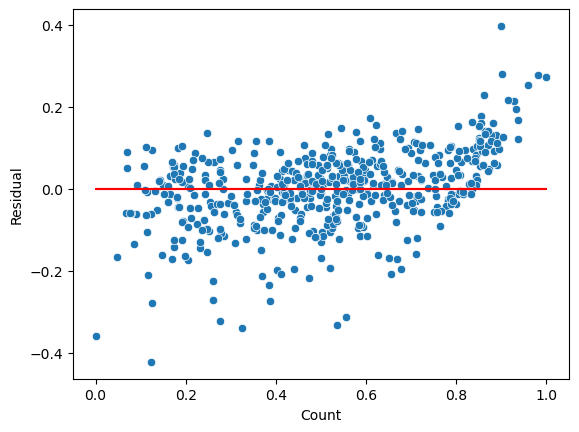

In [175]:
## Homoscedasticity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [176]:
## Step 7: Making Predictions Using the Final Model
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [177]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [179]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [180]:
y_pred = lr_6.predict(X_test_lm_6)

In [181]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7976

Text(0, 0.5, 'y_pred')

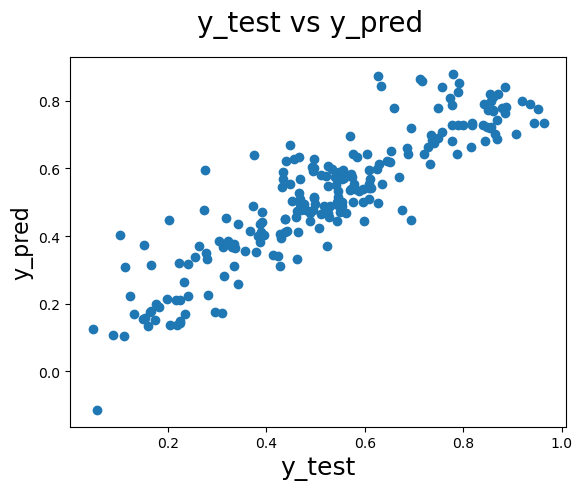

In [182]:
## Step 8: Model Evaluation
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [183]:
round(lr_6.params,4)

const             0.3084
year              0.2357
holiday          -0.0710
workingday        0.0164
temp              0.2383
atemp             0.1313
windspeed        -0.1496
Light_snowrain   -0.2736
Misty            -0.0760
spring           -0.1523
dtype: float64

In [184]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7889


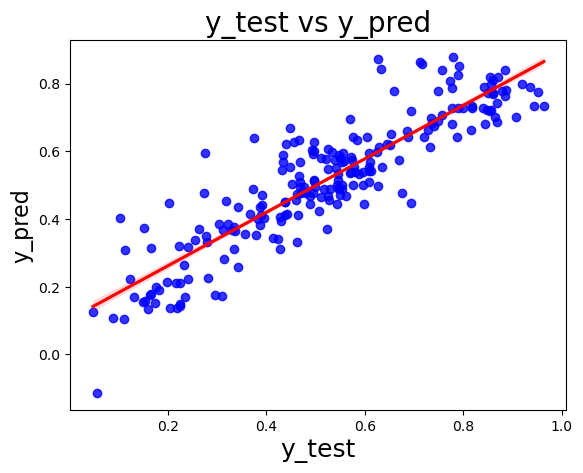

In [185]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()